In [35]:
# imports

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

import base64
from io import BytesIO
from PIL import Image

In [2]:
# Initialization

load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "gpt-4o-mini"

OpenAI API Key exists and begins sk-proj-


In [3]:
# Connect to OpenAI, Anthropic and Google; comment out the Claude or Google lines if you're not using them

import httpx
import anthropic

http_client = httpx.Client(verify=False) # Gotta turn of ssl verification in each of the clients too
os.environ['PYTHONHTTPSVERIFY'] = '0' # I know this is bad practice but my current set up doesn't let me use ssl verification


openai = OpenAI(http_client=http_client)

claude = anthropic.Anthropic(http_client=http_client)

# gemini = OpenAI(
#     http_client=http_client,
#     api_key=google_api_key, 
#     base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
# )

In [4]:
system_message = "You are a helpful assistant for lord of the rings information"


In [23]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    responses = openai.chat.completions.create(model = MODEL, messages = messages)
    return responses.choices[0].message.content

In [24]:
chat_bot = gr.ChatInterface(fn=chat, type="messages")

In [25]:
chat_bot.launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [26]:
lotr_genealogy = {
    "aragorn": {
            "ancestry": ["Arathorn II", "Gilraen", "Isildur (distant ancestor)", "Elendil (distant ancestor)"],
            "descendants": ["Eldarion", "Several daughters (unnamed in canon)"],
            "siblings": [],
            "house": "House of Elendil/Isildur, Chieftain of the Dúnedain",
            "race": "Human (Dúnedain)",
            "notable_relatives": ["Elrond (foster father)", "Arwen (wife)"],
            "family_tree": "Arathorn II + Gilraen\n        |\n     Aragorn + Arwen\n        |\n   Eldarion & daughters"
        },
    
    "frodo": {
            "ancestry": ["Drogo Baggins", "Primula Brandybuck"],
            "descendants": [],
            "siblings": [],
            "house": "Baggins family",
            "race": "Hobbit",
            "notable_relatives": ["Bilbo Baggins (cousin/adoptive uncle)", "Merry Brandybuck (cousin)"],
            "family_tree": "Drogo Baggins + Primula Brandybuck\n        |\n      Frodo\n    (adopted by)\n      Bilbo"
    },
    "gandalf": {
        "ancestry": ["Ainur/Maiar (spirit beings created by Ilúvatar)"],
        "descendants": [],
        "siblings": ["Other Maiar (spiritual siblings)"],
        "house": "Order of Istari/Wizards",
        "race": "Maia/Wizard",
        "notable_relatives": ["Manwë (lord of the Valar, whom Gandalf served)"],
        "family_tree": "Ilúvatar (creator)\n      |\n     Ainur\n      |\n    Maiar\n      |\n   Gandalf/Olórin\n      |\n  No biological descendants"
    },
    
    "eomer": {
        "ancestry": ["Éomund of Eastfold", "Théodwyn (sister of King Théoden)"],
        "descendants": ["Historical records mention he had at least one son who continued the royal line"],
        "siblings": ["Éowyn"],
        "house": "House of Eorl",
        "race": "Human (Rohirrim)",
        "notable_relatives": ["Théoden (maternal uncle and predecessor as King)", "Théodred (cousin)"],
        "family_tree": "Thengel + Morwen\n      |\n  Théodwyn + Éomund    Théoden\n      |                 |\n  Éomer  Éowyn      Théodred"
    },
    
    "eowyn": {
        "ancestry": ["Éomund of Eastfold", "Théodwyn (sister of King Théoden)"],
        "descendants": ["Elboron (son with Faramir)"],
        "siblings": ["Éomer"],
        "house": "House of Eorl, later House of Húrin (by marriage)",
        "race": "Human (Rohirrim)",
        "notable_relatives": ["Théoden (maternal uncle)", "Théodred (cousin)", "Faramir (husband)"],
        "family_tree": "Thengel + Morwen\n      |\n  Théodwyn + Éomund    Théoden\n      |                 |\n  Éomer  Éowyn + Faramir  Théodred\n             |\n          Elboron"
    },
    
    "faramir": {
        "ancestry": ["Denethor II", "Finduilas of Dol Amroth"],
        "descendants": ["Elboron (son with Éowyn)"],
        "siblings": ["Boromir"],
        "house": "House of Húrin",
        "race": "Human (Gondorian/Dúnedain)",
        "notable_relatives": ["Éowyn (wife)", "Imrahil of Dol Amroth (maternal uncle)"],
        "family_tree": "Ecthelion II\n      |\nDenethor II + Finduilas of Dol Amroth\n      |         |\n   Boromir   Faramir + Éowyn\n                  |\n               Elboron"
    },
    
    "boromir": {
        "ancestry": ["Denethor II", "Finduilas of Dol Amroth"],
        "descendants": [],
        "siblings": ["Faramir"],
        "house": "House of Húrin",
        "race": "Human (Gondorian/Dúnedain)",
        "notable_relatives": ["Imrahil of Dol Amroth (maternal uncle)"],
        "family_tree": "Ecthelion II\n      |\nDenethor II + Finduilas of Dol Amroth\n      |         |\n   Boromir   Faramir\n    (died without heirs)"
    },
    
    "merry": {
        "ancestry": ["Saradoc Brandybuck (father)", "Esmeralda Took (mother)"],
        "descendants": ["Not specifically named in canon"],
        "siblings": [],
        "house": "Brandybuck family",
        "race": "Hobbit",
        "notable_relatives": ["Pippin (cousin)", "Frodo (distant cousin)", "Rorimac 'Old Rory' Brandybuck (grandfather)"],
        "family_tree": "Rorimac Brandybuck\n         |\nSaradoc + Esmeralda Took\n         |\n     Meriadoc 'Merry'"
    },
    
    "pippin": {
        "ancestry": ["Paladin Took II (father)", "Eglantine Banks (mother)"],
        "descendants": ["Faramir Took I (son)"],
        "siblings": ["Pearl Took", "Pimpernel Took", "Pervinca Took"],
        "house": "Took family",
        "race": "Hobbit",
        "notable_relatives": ["Merry (cousin)", "Bilbo (cousin)", "Frodo (cousin)"],
        "family_tree": "Adalgrim Took\n      |\nPaladin II + Eglantine Banks\n      |\nPearl, Pimpernel, Pervinca, Peregrin 'Pippin' + Diamond of Long Cleeve\n                                          |\n                                     Faramir Took I"
    },
    
    "sam": {
        "ancestry": ["Hamfast 'Gaffer' Gamgee (father)", "Bell Goodchild (mother)"],
        "descendants": ["Elanor", "Frodo", "Rose", "Merry", "Pippin", "Goldilocks", "Hamfast", "Daisy", "Primrose", "Bilbo", "Ruby", "Robin", "Tom"],
        "siblings": ["Hamson", "Halfred", "Daisy", "May", "Marigold"],
        "house": "Gamgee family, later Gardner family",
        "race": "Hobbit",
        "notable_relatives": ["Rosie Cotton (wife)"],
        "family_tree": "Hamfast 'Gaffer' + Bell Goodchild\n          |\n     Samwise + Rose Cotton\n          |\nElanor, Frodo, Rose, Merry, Pippin, Goldilocks, Hamfast, Daisy, Primrose, Bilbo, Ruby, Robin, Tom"
    },
    
    "theoden": {
        "ancestry": ["Thengel (father)", "Morwen Steelsheen (mother)"],
        "descendants": ["Théodred (son, deceased before Théoden)"],
        "siblings": ["Théodwyn (sister)", "Three unnamed sisters"],
        "house": "House of Eorl",
        "race": "Human (Rohirrim)",
        "notable_relatives": ["Éomer (nephew, heir)", "Éowyn (niece)"],
        "family_tree": "Fengel\n   |\nThengel + Morwen Steelsheen\n   |\nThéoden + Wife (unnamed)  Théodwyn + Éomund  Three sisters\n   |                        |\nThéodred                Éomer  Éowyn"
    },
    
    "legolas": {
        "ancestry": ["Thranduil (father)", "Mother (unnamed in canon)"],
        "descendants": [],
        "siblings": ["None mentioned in canon"],
        "house": "Royal House of the Woodland Realm/Mirkwood",
        "race": "Elf (Sindarin)",
        "notable_relatives": ["Oropher (grandfather)"],
        "family_tree": "Oropher\n   |\nThranduil + Unknown wife\n   |\nLegolas"
    },
    
    "gimli": {
        "ancestry": ["Glóin (father)", "Mother (unnamed in canon)"],
        "descendants": ["None mentioned in canon"],
        "siblings": ["None mentioned in canon"],
        "house": "Durin's Folk/Longbeards",
        "race": "Dwarf",
        "notable_relatives": ["Óin (uncle)", "Thorin Oakenshield (distant cousin)", "Balin, Dwalin (relatives)"],
        "family_tree": "Gróin\n   |\nGlóin + Unknown wife  Óin\n   |\nGimli"
    }
}

In [99]:
def get_character_genealogy(character_name):
    
    character_name = character_name.lower().strip()
    
    
    if character_name in lotr_genealogy:
        return lotr_genealogy[character_name], character_name
    else:
        return {"error": f"Character '{character_name}' not found in genealogy database."}, character_name
    

In [42]:
lotr_genealogy_finder = {
    "name": "get_character_genealogy",
    "description": "Get the genealogy information for characters in Lord of the rings. Call this when you need to know the Genealogy of a Lord of the rings character",
    "parameters": {
        "type": "object",
        "properties": {
            "character_name": {
                "type": "string",
                "description": "The character that the client wants to know the genealogy of",
            },
        },
        "required": ["character_name"],
        "additionalProperties": False
    }
}


In [33]:
def lotr_char_image_generator(character):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"Create an image of {character} from Lord of the rings, in a mystical forest, with bright golden lighting upon their face and a glorious powerful demeanor",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

In [43]:
lotr_image_generator = {
    "name": "lotr_char_image_generator",
    "description": "Get an image of a Lord of the rings character. Call this when ever you need to generate an image of a Lord of the rings character",
    "parameters": {
        "type": "object",
        "properties": {
            "character_name": {
                "type": "string",
                "description": "The character that the client wants to generate an image of",
            },
        },
        "required": ["character_name"],
        "additionalProperties": False
    }
}

In [45]:
tools = [{"type": "function", "function": lotr_genealogy_finder},
         {"type": "function", "function": lotr_image_generator}]

In [94]:
def chat(history):
    # Setting up the inital message below
    messages = [{"role": "system", "content": system_message}] + history
    # Making the first call
    response = openai.chat.completions.create(model=MODEL, messages=messages, tools=tools)
    global image
    
    if response.choices[0].finish_reason == "tool_calls":
        message = response.choices[0].message
        tool_call = message.tool_calls[0]
        tool_name = tool_call.function.name
        arguments = json.loads(tool_call.function.arguments)
        character_name = arguments.get('character_name')
        
        
        assistant_content = message.content if message.content is not None else ""
        history.append({"role": "assistant", "content": assistant_content})

        if tool_name == "get_character_genealogy":
            genealogy_info, char_name = get_character_genealogy(character_name)
            image = lotr_char_image_generator(char_name)
            
            # Send response back to API
            api_messages = messages.copy()
            api_messages.append({
                "role": "assistant", 
                "content": assistant_content,
                "tool_calls": [tool_call]
            })
            
            api_messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "content": json.dumps(genealogy_info)
            })
            
            
            final_response = openai.chat.completions.create(model=MODEL, messages=api_messages)
            reply = final_response.choices[0].message.content or f"Information about {char_name}"
            history.append({"role": "assistant", "content": reply})
            
        elif tool_name == "lotr_char_image_generator":
            image = lotr_char_image_generator(character_name)
            history.append({"role": "assistant", "content": f"Here's an image of {character_name}!"})
    else:
        
        reply = response.choices[0].message.content or ""
        history.append({"role": "assistant", "content": reply})
    
    return history, image

In [96]:
image = None

In [98]:

with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=500, type="messages")
        image_output = gr.Image(height=500)
    with gr.Row():
        entry = gr.Textbox(label="Lord of the Rings Chatbot:")
    with gr.Row():
        clear = gr.Button("Clear")

    def do_entry(message, history):
        history += [{"role":"user", "content":message}]
        return "", history

    entry.submit(do_entry, inputs=[entry, chatbot], outputs=[entry, chatbot]).then(
        chat, inputs=chatbot, outputs=[chatbot, image_output]
    )
    clear.click(lambda: None, inputs=None, outputs=chatbot, queue=False)

ui.launch(inbrowser=True)



* Running on local URL:  http://127.0.0.1:7888

To create a public link, set `share=True` in `launch()`.


In [36]:
lotr_image = lotr_char_image_generator("Frodo")

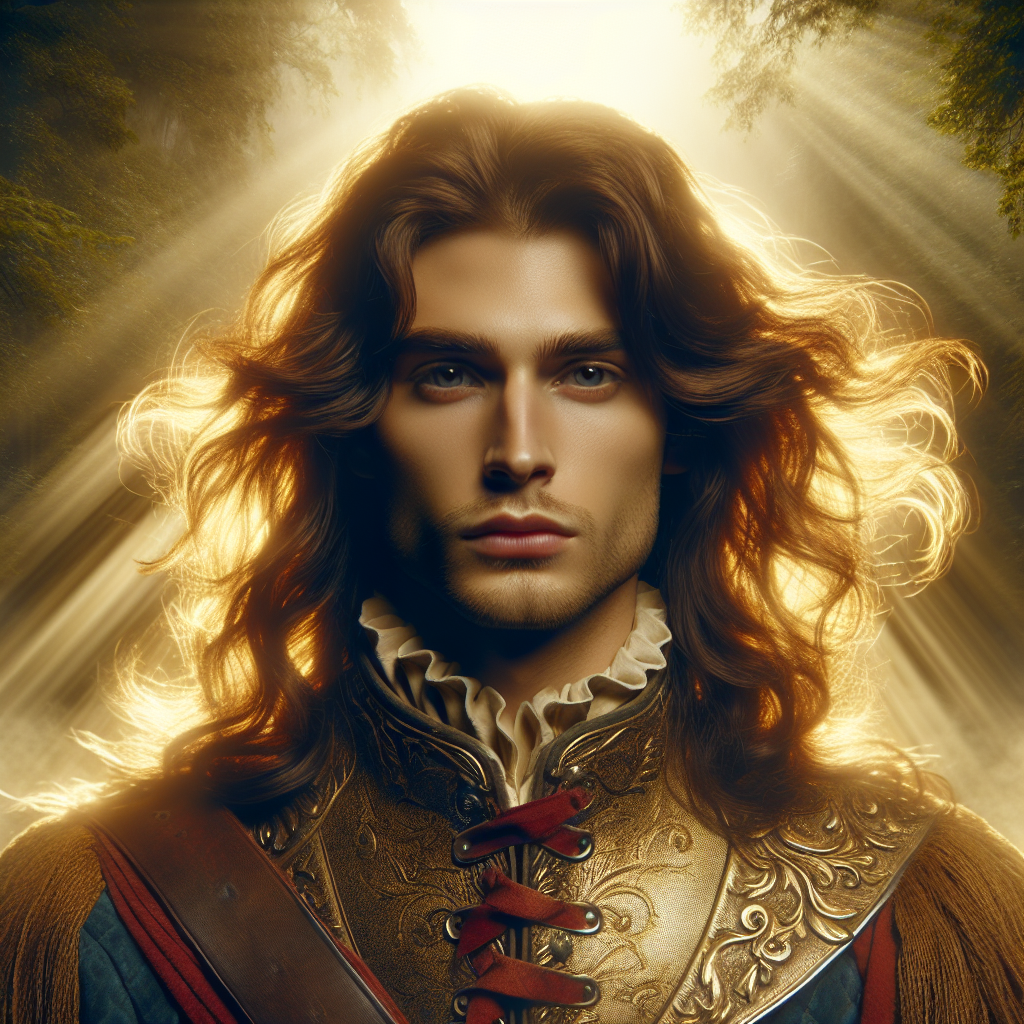

In [38]:
display(lotr_image)

In [39]:
lotr_image2 = lotr_char_image_generator("Frodo")

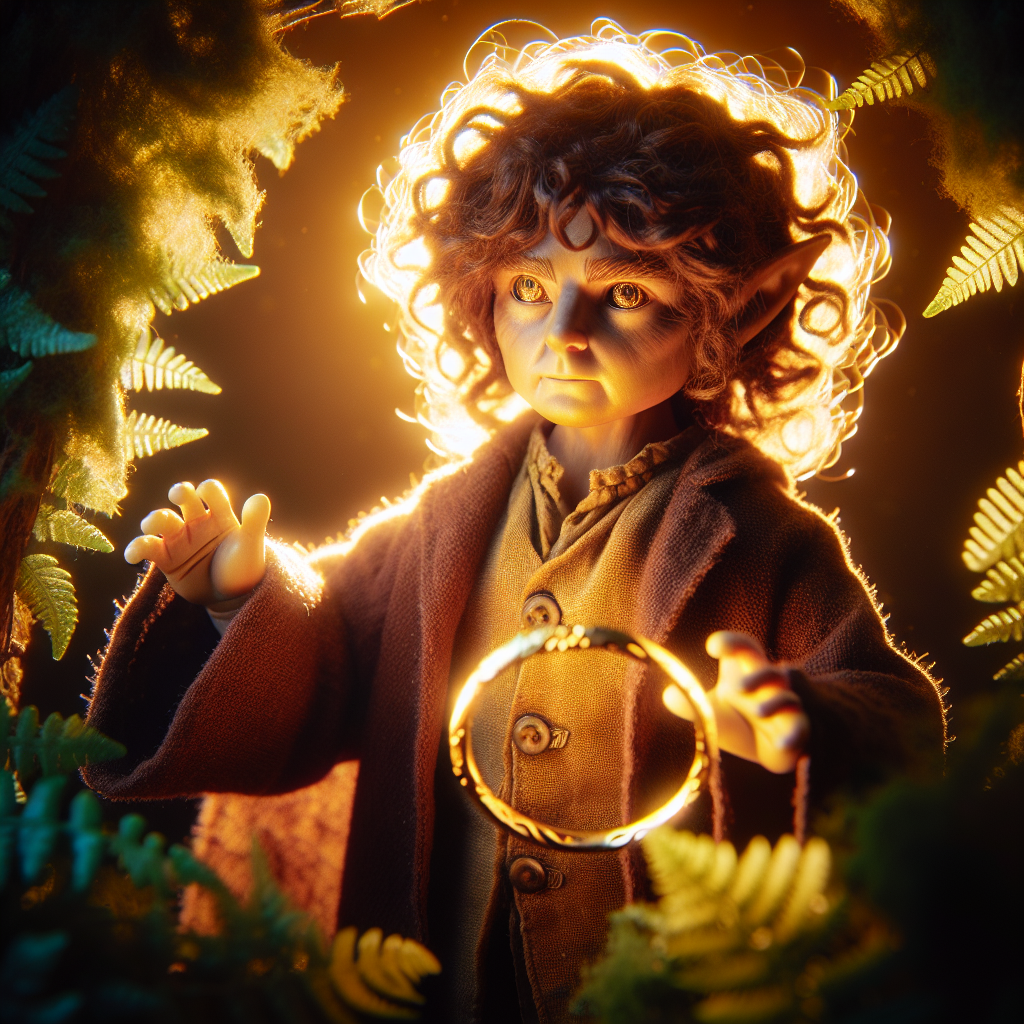

In [40]:
display(lotr_image2)